In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('D:/Covid19-Death-Predictions/train.csv')

In [3]:
df

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
0,911530868,World,2372.0,2020,0.300,65.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0
1,807936902,World,5023.0,2020,0.635,114.0,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0
2,773590408,World,5612.0,2020,0.710,116.0,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0
3,130466459,World,7580.0,2020,0.958,153.0,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0
4,544040446,World,8983.0,2020,1.136,187.0,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129151,541829605,Zimbabwe,464.0,2022,29.012,13.0,0.813,11949993.0,6297324.0,4601845.0,1050824.0,5665.0,74.72,39.37,28.77,6.57,354.0,1427.0,0.009,9.0
129152,969939474,Zimbabwe,471.0,2022,29.449,12.0,0.750,11958771.0,6299348.0,4605821.0,1053602.0,5295.0,74.77,39.39,28.80,6.59,331.0,1362.0,0.009,7.0
129153,667902340,Zimbabwe,450.0,2022,28.136,13.0,0.813,NaN,NaN,NaN,NaN,5316.0,NaN,NaN,NaN,NaN,332.0,1483.0,0.009,5.0
129154,961193720,Zimbabwe,277.0,2022,17.320,6.0,0.375,11974313.0,6305470.0,4611113.0,1057730.0,5358.0,74.87,39.43,28.83,6.61,335.0,1633.0,0.010,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129156 entries, 0 to 129155
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Id                                   129156 non-null  int64  
 1   Location                             129156 non-null  object 
 2   Weekly Cases                         128943 non-null  float64
 3   Year                                 129156 non-null  int64  
 4   Weekly Cases per Million             128288 non-null  float64
 5   Weekly Deaths                        127898 non-null  float64
 6   Weekly Deaths per Million            127247 non-null  float64
 7   Total Vaccinations                   40270 non-null   float64
 8   People Vaccinated                    38429 non-null   float64
 9   People Fully Vaccinated              36574 non-null   float64
 10  Total Boosters                       19847 non-null   float64
 11  Daily Vaccina

<AxesSubplot:>

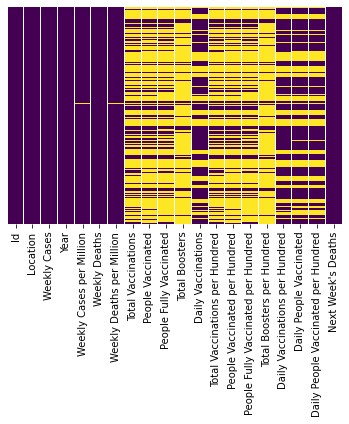

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.isnull().sum()

Id                                          0
Location                                    0
Weekly Cases                              213
Year                                        0
Weekly Cases per Million                  868
Weekly Deaths                            1258
Weekly Deaths per Million                1909
Total Vaccinations                      88886
People Vaccinated                       90727
People Fully Vaccinated                 92582
Total Boosters                         109309
Daily Vaccinations                      51316
Total Vaccinations per Hundred          88886
People Vaccinated per Hundred           90727
People Fully Vaccinated per Hundred     92582
Total Boosters per Hundred             109309
Daily Vaccinations per Hundred          51316
Daily People Vaccinated                 51765
Daily People Vaccinated per Hundred     51765
Next Week's Deaths                          0
dtype: int64

In [7]:
df.corr()['''Next Week's Deaths''']

Id                                    -0.002262
Weekly Cases                           0.660833
Year                                  -0.020374
Weekly Cases per Million               0.009862
Weekly Deaths                          0.992956
Weekly Deaths per Million              0.085626
Total Vaccinations                     0.414776
People Vaccinated                      0.450899
People Fully Vaccinated                0.399660
Total Boosters                         0.204060
Daily Vaccinations                     0.660108
Total Vaccinations per Hundred        -0.097737
People Vaccinated per Hundred         -0.110803
People Fully Vaccinated per Hundred   -0.128481
Total Boosters per Hundred            -0.199904
Daily Vaccinations per Hundred         0.023978
Daily People Vaccinated                0.642869
Daily People Vaccinated per Hundred    0.017402
Next Week's Deaths                     1.000000
Name: Next Week's Deaths, dtype: float64

In [8]:
df.groupby('Year').mean()

,Id,Weekly Cases,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
Year,,,,,,,,,,,,,,,,,,
2020,5.511817e+08,42837.938954,425.764538,990.350338,7.982709,7.164571e+05,4.650458e+05,8.199230e+03,1.000000e+00,74279.474138,0.290205,0.287143,0.000738,0.000000,363.410920,49077.500000,0.034420,1006.511365
2021,5.507007e+08,76299.791715,1022.586635,1342.544707,14.061087,1.410097e+08,7.473558e+07,5.485143e+07,6.645961e+06,558566.950278,61.242191,33.775779,27.800623,4.950560,3277.363829,243571.587057,0.157281,1324.765157
2022,5.481543e+08,202898.168462,3362.265360,669.430260,8.555170,4.804568e+08,2.154228e+08,1.873369e+08,7.587129e+07,328903.193639,154.733431,65.990661,60.094418,33.401969,1708.750359,75875.749112,0.040428,646.585754


In [9]:
df.columns

Index(['Id', 'Location', 'Weekly Cases', 'Year', 'Weekly Cases per Million',
       'Weekly Deaths', 'Weekly Deaths per Million', 'Total Vaccinations',
       'People Vaccinated', 'People Fully Vaccinated', 'Total Boosters',
       'Daily Vaccinations', 'Total Vaccinations per Hundred',
       'People Vaccinated per Hundred', 'People Fully Vaccinated per Hundred',
       'Total Boosters per Hundred', 'Daily Vaccinations per Hundred',
       'Daily People Vaccinated', 'Daily People Vaccinated per Hundred',
       'Next Week's Deaths'],
      dtype='object')

In [10]:
df.isnull().mean() * 100



Id                                      0.000000
Location                                0.000000
Weekly Cases                            0.164917
Year                                    0.000000
Weekly Cases per Million                0.672055
Weekly Deaths                           0.974016
Weekly Deaths per Million               1.478058
Total Vaccinations                     68.820651
People Vaccinated                      70.246059
People Fully Vaccinated                71.682307
Total Boosters                         84.633312
Daily Vaccinations                     39.731797
Total Vaccinations per Hundred         68.820651
People Vaccinated per Hundred          70.246059
People Fully Vaccinated per Hundred    71.682307
Total Boosters per Hundred             84.633312
Daily Vaccinations per Hundred         39.731797
Daily People Vaccinated                40.079439
Daily People Vaccinated per Hundred    40.079439
Next Week's Deaths                      0.000000
dtype: float64

In [11]:
{'Daily People Vaccinated',
 'People Fully Vaccinated',
 'People Fully Vaccinated per Hundred',
 'People Vaccinated',
 'People Vaccinated per Hundred',
 'Total Boosters'}

{'Daily People Vaccinated',
 'People Fully Vaccinated',
 'People Fully Vaccinated per Hundred',
 'People Vaccinated',
 'People Vaccinated per Hundred',
 'Total Boosters'}

<AxesSubplot:ylabel='Density'>

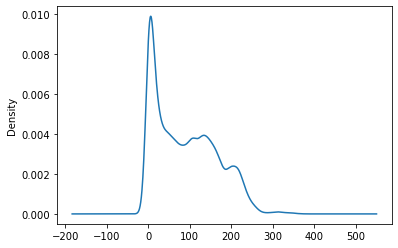

In [12]:
df['Total Vaccinations per Hundred'].plot(kind='kde')

In [13]:
df['Daily Vaccinations per Hundred'].fillna(value=df['Daily Vaccinations per Hundred'].median(),inplace=True)
df['Daily People Vaccinated per Hundred'].fillna(value=df['Daily People Vaccinated per Hundred'].median(),inplace=True)
df['Total Boosters'].fillna(value=df['Total Boosters'].median(),inplace=True)
df['Total Boosters per Hundred'].fillna(value=df['Total Boosters per Hundred'].median(),inplace=True)
df['Weekly Cases'].fillna(value=df['Weekly Cases'].mean(),inplace=True)
df['Weekly Deaths'].fillna(value=df['Weekly Deaths'].mean(),inplace=True)
df['Weekly Cases per Million'].fillna(value=df['Weekly Cases per Million'].median(),inplace=True)
df['Weekly Deaths per Million'].fillna(value=df['Weekly Deaths per Million'].median(),inplace=True)
df['Total Vaccinations'].fillna(value=df['Total Vaccinations'].median(),inplace=True)
df['People Vaccinated'].fillna(value=df['People Vaccinated'].median(),inplace=True)
df['People Fully Vaccinated'].fillna(value=df['People Fully Vaccinated'].median(),inplace=True)
df['Daily Vaccinations'].fillna(value=df['Daily Vaccinations'].median(),inplace=True)
df['Daily People Vaccinated'].fillna(value=df['Daily People Vaccinated'].median(),inplace=True)
df['Total Vaccinations per Hundred'].fillna(value=df['Total Vaccinations per Hundred'].median(),inplace=True)
df['People Vaccinated per Hundred'].fillna(value=df['People Vaccinated per Hundred'].median(),inplace=True)
df['People Fully Vaccinated per Hundred'].fillna(value=df['People Fully Vaccinated per Hundred'].median(),inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129156 entries, 0 to 129155
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Id                                   129156 non-null  int64  
 1   Location                             129156 non-null  object 
 2   Weekly Cases                         129156 non-null  float64
 3   Year                                 129156 non-null  int64  
 4   Weekly Cases per Million             129156 non-null  float64
 5   Weekly Deaths                        129156 non-null  float64
 6   Weekly Deaths per Million            129156 non-null  float64
 7   Total Vaccinations                   129156 non-null  float64
 8   People Vaccinated                    129156 non-null  float64
 9   People Fully Vaccinated              129156 non-null  float64
 10  Total Boosters                       129156 non-null  float64
 11  Daily Vaccina

In [16]:
Location=df['Location'].value_counts().to_dict()

In [17]:
df['Location']=df['Location'].map(Location)

In [18]:
X = df.drop(['''Next Week's Deaths'''],axis=1)
y= df['''Next Week's Deaths''']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [21]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.01)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.01)

In [22]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [23]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

6

In [25]:
corr_features

{'Daily People Vaccinated',
 'People Fully Vaccinated',
 'People Fully Vaccinated per Hundred',
 'People Vaccinated',
 'People Vaccinated per Hundred',
 'Total Boosters'}

In [26]:
X_train.drop(corr_features,axis=1,inplace=True)

C:\Users\chand\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
X_test.drop(corr_features,axis=1,inplace=True)

In [28]:
X_train

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,Daily Vaccinations,Total Vaccinations per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated per Hundred
13936,755862910,595,2353.0,2022,5882.044,8.0,19.998,7772026.5,338.0,79.195,9.78,845.0,0.011
14701,670597532,594,29.0,2020,451.819,1.0,15.580,7772026.5,9182.5,79.195,9.78,1498.0,0.046
111128,795774293,645,7099.0,2021,326.039,410.0,18.830,26376809.0,80474.0,121.140,9.78,3696.0,0.166
81177,303122206,608,0.0,2020,0.000,0.0,0.000,7772026.5,9182.5,79.195,9.78,1498.0,0.046
122435,127904875,648,158796.0,2020,2360.189,1658.0,24.643,7772026.5,9182.5,79.195,9.78,1498.0,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,798307298,661,76851.0,2021,1697.360,1546.0,34.146,37393260.0,345776.0,82.590,0.00,7637.0,0.196
73542,909722437,599,0.0,2021,0.000,0.0,0.000,7772026.5,9182.5,79.195,9.78,1498.0,0.046
83281,815250410,635,5768.0,2021,107.216,44.0,0.818,7772026.5,5075.0,79.195,9.78,94.0,0.063
83467,879702279,635,22190.0,2022,412.468,34.0,0.632,7772026.5,115019.0,79.195,9.78,2138.0,0.087


In [29]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [30]:
model = xgboost.XGBRegressor()

In [31]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [32]:
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='neg_mean_absolute_error',n_jobs=-1,cv=5,verbose=3)

In [33]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          num_parallel_tree=None,
                                        

In [ ]:
predictions = random_search.predict(X_test)

In [ ]:
plt.scatter(x=y_test,y=predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),verbose=1,
          batch_size=128,epochs=150)

In [ ]:
losses = pd.DataFrame(model.history.history)


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score


In [ ]:
predictions = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,predictions))


In [ ]:
test_data = pd.read_csv("D:/Covid19-Death-Predictions/test.csv")

In [ ]:
test_data['Daily Vaccinations per Hundred'].fillna(value=df['Daily Vaccinations per Hundred'].median(),inplace=True)
test_data['Daily People Vaccinated per Hundred'].fillna(value=df['Daily People Vaccinated per Hundred'].median(),inplace=True)
test_data['Total Boosters'].fillna(value=df['Total Boosters'].median(),inplace=True)
test_data['Total Boosters per Hundred'].fillna(value=df['Total Boosters per Hundred'].median(),inplace=True)
test_data['Weekly Cases'].fillna(value=df['Weekly Cases'].mean(),inplace=True)
test_data['Weekly Deaths'].fillna(value=df['Weekly Deaths'].mean(),inplace=True)
test_data['Weekly Cases per Million'].fillna(value=df['Weekly Cases per Million'].median(),inplace=True)
test_data['Weekly Deaths per Million'].fillna(value=df['Weekly Deaths per Million'].median(),inplace=True)
test_data['Total Vaccinations'].fillna(value=df['Total Vaccinations'].median(),inplace=True)
test_data['People Vaccinated'].fillna(value=df['People Vaccinated'].median(),inplace=True)
test_data['People Fully Vaccinated'].fillna(value=df['People Fully Vaccinated'].median(),inplace=True)
test_data['Daily Vaccinations'].fillna(value=df['Daily Vaccinations'].median(),inplace=True)
test_data['Daily People Vaccinated'].fillna(value=df['Daily People Vaccinated'].median(),inplace=True)
test_data['Total Vaccinations per Hundred'].fillna(value=df['Total Vaccinations per Hundred'].median(),inplace=True)
test_data['People Vaccinated per Hundred'].fillna(value=df['People Vaccinated per Hundred'].median(),inplace=True)
test_data['People Fully Vaccinated per Hundred'].fillna(value=df['People Fully Vaccinated per Hundred'].median(),inplace=True)

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data['Location']=test_data['Location'].map(Location)

In [ ]:
test_data.drop(corr_features,axis=1,inplace=True)

In [ ]:
test_pred_LR = random_search.predict(test_data)

In [ ]:
sample_submission= pd.read_csv("D:/Covid19-Death-Predictions/sample_submission.csv")
sample_submission['Next Week\'s Deaths']=test_pred_LR
LR_results=sample_submission
print(LR_results)
LR_results.to_csv("D:/Covid19-Death-Predictions/myrand045.csv", index=False)
LR_results.head(28)